<a href="https://colab.research.google.com/github/LuizOctavioMedeiros/PythonDataScience/blob/main/Alura_03_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/numpy/dados/apples_ts.csv'

In [ ]:
dado = np.loadtxt(url, delimiter=',', usecols=np.arange(1, 88, 1))
# É melhor utilizar uma url como entrada, porque o arquivo csv teria que ser carregado toda vez que usa o Google Collab
# Utilizar o 'usecols=' para excluir a primeira coluna
# Utilizar o 'np.arange(primeira coluna, última coluna + 1, incremento)' para gerar uma lista de 1 a 87

In [ ]:
# cria uma lista
lista = [1, 2, 3, 4, 5]

# transforma a lista em um array Numpy
array = np.array(lista)

print("Lista: ", lista)
print("Array: ", array)

Lista:  [1, 2, 3, 4, 5]
Array:  [1 2 3 4 5]


In [ ]:
dado.ndim
# Verificar o número de dimensões do array

2

In [ ]:
dado.size
# Verificar o número de dados que possui o array

522

In [ ]:
dado.shape

(6, 87)

In [ ]:
dado_transposto = dado.T

In [ ]:
datas = dado_transposto[:,0]
# Para selecionar algo no dataset, o padrão é [linha, coluna]
# Nesse caso, estamos pegando todas as linhas da Coluna 0

In [ ]:
precos = dado_transposto[:,1:]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
datas = np.arange(1, 88, 1)

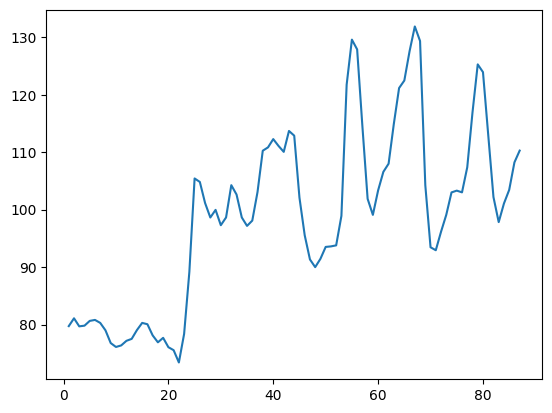

In [ ]:
plt.plot(datas, precos[:,0])

In [ ]:
Moscow = precos[:,0]
Kaliningrad = precos[:,1]
Petersburg = precos[:,2]
Krasnodar = precos[:,3]
Ekaterinburg = precos[:,4]

In [ ]:
Moscow.shape

(87,)

In [ ]:
Moscow_ano1 = Moscow[0:12]
Moscow_ano2 = Moscow[12:24]
Moscow_ano3 = Moscow[24:36]
Moscow_ano4 = Moscow[36:48]

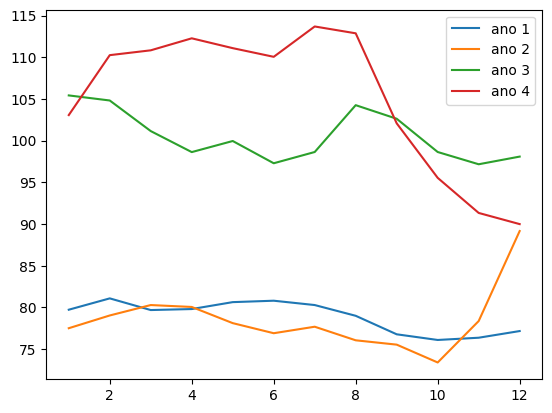

In [ ]:
plt.plot(np.arange(1,13,1), Moscow_ano1)
plt.plot(np.arange(1,13,1), Moscow_ano2)
plt.plot(np.arange(1,13,1), Moscow_ano3)
plt.plot(np.arange(1,13,1), Moscow_ano4)
plt.legend(['ano 1', 'ano 2', 'ano 3', 'ano 4'])

In [ ]:
np.array_equal(Moscow_ano3, Moscow_ano4)

False

In [ ]:
np.allclose(Moscow_ano3, Moscow_ano4, 10)

True

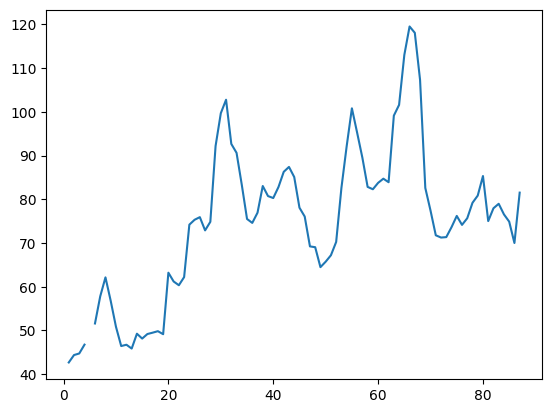

In [ ]:
plt.plot(datas, Kaliningrad)

In [ ]:
sum(np.isnan(Kaliningrad))

1

In [ ]:
# (Kaliningrad[3] + Kaliningrad[5])/2
# Calcular a média dos valores anteriores e posteriores ao NaN
media = np.mean([Kaliningrad[3], Kaliningrad[5]])

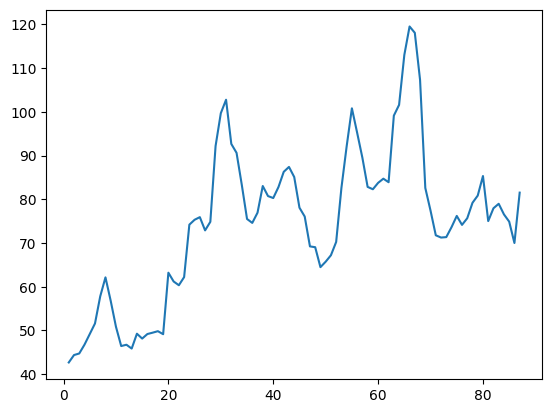

In [ ]:
Kaliningrad[4] = media
plt.plot(datas, Kaliningrad)

In [ ]:
np.mean(Moscow)

98.79781609195402

In [ ]:
np.mean([Kaliningrad])

74.5506896551724

Equação da reta como aproximação: y = a*x + b

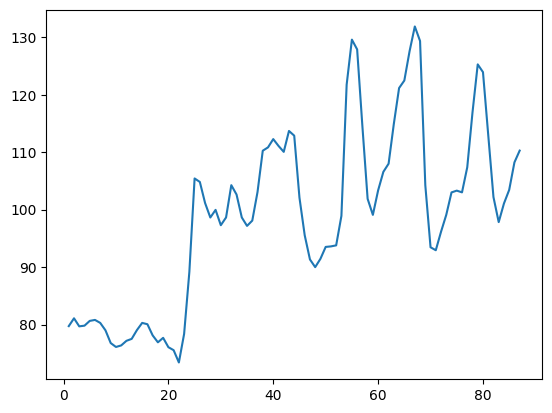

In [ ]:
plt.plot(datas, Moscow)

In [ ]:
x = datas

In [ ]:
y = 0.52*x + 80

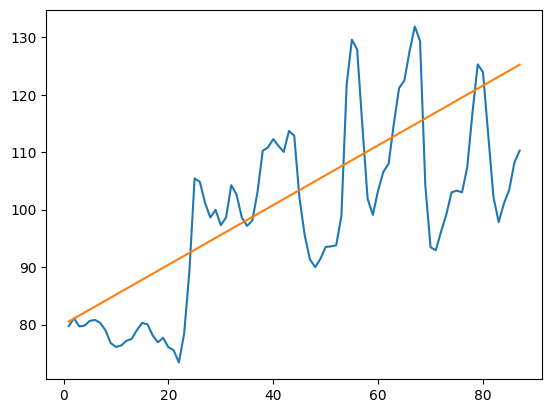

In [ ]:
plt.plot(datas, Moscow)
plt.plot(x, y)

In [ ]:
np.sqrt(np.sum(np.power(Moscow-y, 2)))

110.48504740461489

In [ ]:
np.linalg.norm(Moscow-y)

110.48504740461489

Fórmula para **Regressão Linear**

In [ ]:
Y = Moscow
X = datas
n = np.size(Moscow)

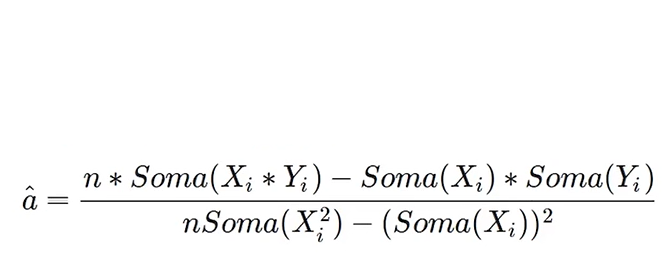

In [ ]:
a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2) - np.sum(X)**2)

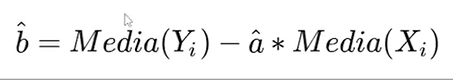

In [ ]:
b = np.mean(Y) - a*np.mean(X)

In [ ]:
y = a*X+b

In [ ]:
np.linalg.norm(Moscow-y)

101.7969539992751

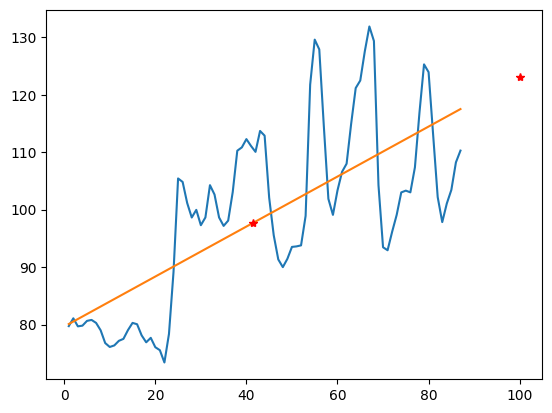

In [ ]:
plt.plot(datas, Moscow)
plt.plot(x, y)
plt.plot(41.5, 41.5*a + b, '*r')
plt.plot(100, 100*a + b, '*r')

In [ ]:
np.random.randint(low=40, high=100, size=100)

array([53, 60, 77, 84, 89, 85, 71, 71, 95, 92, 85, 72, 92, 92, 86, 62, 83,
       64, 78, 92, 50, 97, 92, 43, 52, 85, 86, 88, 93, 76, 90, 76, 43, 77,
       67, 55, 45, 47, 97, 43, 51, 79, 40, 55, 80, 49, 97, 97, 51, 65, 56,
       56, 84, 94, 70, 76, 99, 47, 81, 94, 53, 70, 65, 65, 79, 97, 41, 60,
       70, 72, 46, 87, 78, 74, 46, 83, 83, 94, 55, 51, 88, 44, 70, 54, 93,
       90, 47, 78, 66, 92, 47, 98, 47, 43, 55, 84, 85, 46, 63, 42])

In [ ]:
coef_angulares = np.random.uniform(low=0.1, high=0.9, size=100)

In [ ]:
norma = np.array([])
for i in range(100):
  norma = np.append(norma, np.linalg.norm(Moscow - (coef_angulares[i]*X + b)))

In [ ]:
posicao_do_min = np.argmin(norma)
posicao_do_min

47

In [ ]:
coef_angulares[posicao_do_min]

0.43009215800760847

Padronizando a aleatoriedade com o SEED

In [ ]:
np.random.seed(84)
coef_angulares = np.random.uniform(low=0.1, high=0.9, size=100)
norma = np.array([])
for i in range(100):
  norma = np.append(norma, np.linalg.norm(Moscow - (coef_angulares[i]*X + b)))

In [ ]:
dados = np.column_stack([norma, coef_angulares])
dados.shape

(100, 2)

In [ ]:
np.savetxt('dados.csv', dados, delimiter=',')

**Exemplo de utilização de numpy**

In [ ]:
import numpy as np
x = [0,1,2,3,4,5,6,7,8,9,10]
x = np.array(x)
y = x + 3 / 2
print(y)
print(type(y))

[ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5]
<class 'numpy.ndarray'>


**Desafio**

In [ ]:
# Importar dados
url_desafio = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'
desafio_database = np.loadtxt(url_desafio, delimiter=',', skiprows=1, usecols=np.arange(1,6,1))
desafio_database

array([[  2.96,  86.76, 172.  ,  85.  ,   2.  ],
       [  3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  4.42,  95.17, 156.  ,  81.  ,   2.  ],
       ...,
       [ 15.59, 256.5 , 168.  ,  82.  ,  20.  ],
       [ 15.92, 260.14, 142.  ,  72.  ,  11.  ],
       [ 16.45, 261.51, 152.  ,  74.  ,   2.  ]])

In [ ]:
# Laranja
diametro_laranja = desafio_database[:5000,0]
peso_laranja = desafio_database[:5000,1]

# Toranja
diametro_toranja = desafio_database[5000:,0]
peso_toranja = desafio_database[5000:,1]

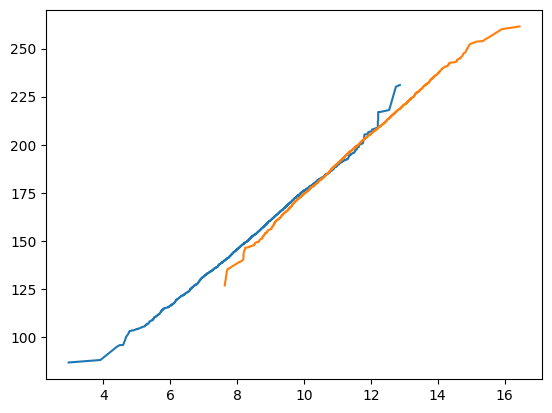

In [ ]:
plt.plot(diametro_laranja, peso_laranja)
plt.plot(diametro_toranja, peso_toranja)

In [ ]:
# Laranja
n_laranja = np.size(peso_laranja)
X_laranja = diametro_laranja
Y_laranja = peso_laranja

a_laranja = (n_laranja*np.sum(X_laranja*Y_laranja) - np.sum(X_laranja)*np.sum(Y_laranja)) / (n_laranja*np.sum(X_laranja**2) - (np.sum(X_laranja)**2))
b_laranja = np.average(Y_laranja) - a_laranja*np.average(X_laranja)

y_laranja = a_laranja*X_laranja + b_laranja

print(a_laranja, b_laranja)

14.7997452319846 27.38560381218413


In [ ]:
# Toranja
n_toranja = np.size(peso_toranja)
X_toranja = diametro_toranja
Y_toranja = peso_toranja

a_toranja = (n_toranja*np.sum(X_toranja*Y_toranja) - np.sum(X_toranja)*np.sum(Y_toranja)) / (n_toranja*np.sum(X_toranja**2) - (np.sum(X_toranja)**2))
b_toranja = np.average(Y_toranja) - a_toranja*np.average(X_toranja)

y_toranja = a_toranja*X_toranja + b_toranja

print(a_toranja, b_toranja)

15.70884459360376 17.007102876817726


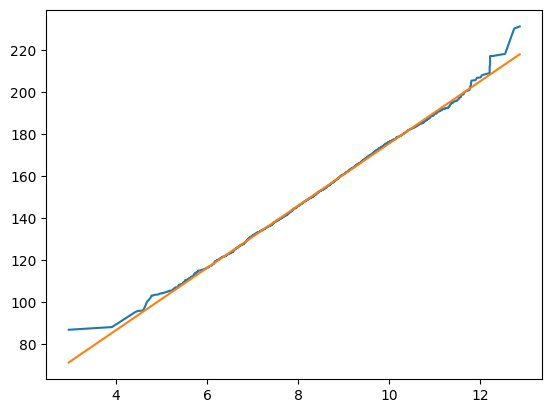

In [ ]:
# Plot laranja:
plt.plot(diametro_laranja, peso_laranja)
plt.plot(X_laranja, y_laranja)

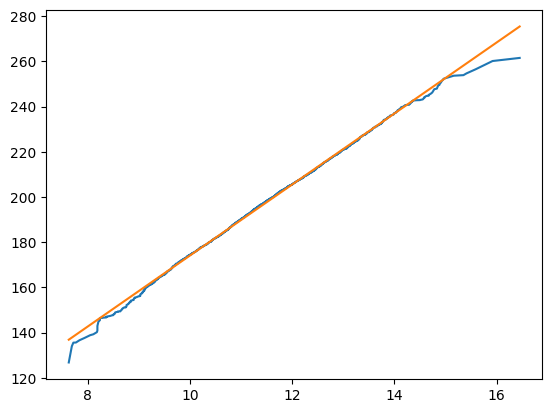

In [ ]:
# Plot toranja:
plt.plot(diametro_toranja, peso_toranja)
plt.plot(X_toranja, y_toranja)

In [ ]:
# Calcular coeficiente angular dado b = 17
b_laranja = 17
np.random.seed(40)
a_2_laranja = np.random.uniform(1, 50, 100)

In [ ]:
norma_laranja = np.array([])
for i in range(100):
  norma_laranja = np.append(norma_laranja, np.linalg.norm(Y_laranja - (a_2_laranja[i]*X_laranja + b_laranja)))

menor_norma_laranja = np.argmin(norma_laranja)
menor_norma_laranja

5

In [ ]:
a_laranja_novo = a_2_laranja[menor_norma_laranja]
print(a_laranja, a_laranja_novo)

14.7997452319846 15.891702961697511


In [ ]:
# Calcular coeficiente angular dado b = 17
b_toranja = 17
np.random.seed(40)
a_2_toranja = np.random.uniform(1, 50, 100)

norma_toranja = np.array([])
for i in range(100):
  norma_toranja = np.append(norma_toranja, np.linalg.norm(Y_toranja - (a_2_toranja[i]*X_toranja + b_toranja)))

menor_norma_toranja = np.argmin(norma_toranja)
menor_norma_toranja

a_toranja_novo = a_2_laranja[menor_norma_toranja]
print(a_toranja, a_toranja_novo)

15.70884459360376 15.891702961697511
